In [1]:
##ShareCode Activity
# Jesús Norberto Reyes Muñoz
# A01651207
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
%matplotlib inline
from numpy import genfromtxt

In [2]:
class RedNeuronal(object):
    def __init__(self):
        self.inputs = 4
        self.outputs = 1
        self.hidden = 3
        self.W1 = np.random.randn(self.inputs, self.hidden) # W1 :: 4x3
        self.W2 = np.random.randn(self.hidden, self.outputs) # W2 :: 3x1
    
    def sigmoide(self, z):
        return 1/(1 + np.exp(-z))
    
    def sigmoideDerivada(self, z):
        return np.exp(-z) / ((1 + np.exp(-z))**2)

    def feedForward(self, X):
        self.z2 = X @ self.W1
        self.a2 = self.sigmoide(self.z2)
        self.z3 = self.a2 @ self.W2
        self.yhat = self.sigmoide(self.z3)
        return self.yhat
    
    def funcionCosto(self, X, y):
        self.yhat = self.feedForward(X)
        cost = 0.5 * sum((y - self.yhat)**2)
        return cost
    
    def costFunctionDeriv(self, X, y):
        # Predicciones
        self.yhat = self.feedForward(X)
        # delta3 = diferencia de y - yhat * derivadaFuncionActivacion
        self.delta3 = np.multiply(-(y - self.yhat), self.sigmoideDerivada(self.z3))
        # djW2 = producto transpuesta a2 * delta3
        self.djW2 = np.dot(self.a2.T, self.delta3) # self.a2.T @ self.delta3
        # delta2 = delta3 dot transpuesta W2 * sigmoideDerivada z2
        self.delta2 = self.delta3 @ self.W2.T * self.sigmoideDerivada(self.z2)
        # djDW1 = delta2 dot transpuesta de X
        self.djW1 = X.T @ self.delta2
        return self.djW1, self.djW2
    
    def getPesos(self):
        data = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return data
   
    def setPesos(self, datos):
        W1_inicio = 0
        W1_fin = self.hidden * self.inputs
        self.W1 = np.reshape(datos[W1_inicio:W1_fin], (self.inputs , self.hidden))
        W2_fin = W1_fin + self.hidden*self.outputs
        self.W2 = np.reshape(datos[W1_fin:W2_fin], (self.hidden, self.outputs))

    def getGradientes(self, X, y):
        djW1, djW2 = self.costFunctionDeriv(X, y)
        return np.concatenate((djW1.ravel(), djW2.ravel()))

In [3]:
from scipy import optimize
class Entrenador:
    def __init__(self, unaRed):
        #referencia a una red local
        self.NN = unaRed
       
    def actualizaPesos(self, params):
        self.NN.setPesos(params)
        self.Costos.append(self.NN.funcionCosto(self.X, self.y))  
        self.CostosTest.append(self.NN.funcionCosto(self.Xtest, self.ytest))
       
    def obtenPesosNN(self, params, X, y):
        self.NN.setPesos(params)
        cost = self.NN.funcionCosto(X, y)
        grad = self.NN.getGradientes(X,y)        
        return cost, grad
       
    def entrena(self, X, y, Xtest, ytest):
        # variables para funciones callback
        self.X = X
        self.y = y
        
        self.Xtest = Xtest
        self.ytest = ytest
       
    
        # lista temporal de costos
        self.Costos = []
        self.CostosTest = []
        
        pesos = self.NN.getPesos()
 
        opciones = {'maxiter': 300, 'disp' : True}
       
        #self.obtenPesosNN, funcion objetivo
        #args=(X, y), input / output data
        # salida, regresa el costo y los gradientes
        salida = optimize.minimize(self.obtenPesosNN, pesos, jac=True, method='BFGS', \
                                 args=(X, y), options=opciones, callback=self.actualizaPesos)
 
        self.NN.setPesos(salida.x)
        self.resultados = salida

In [4]:

taxis = pd.read_csv("train.csv")
taxis

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [5]:
rn = RedNeuronal()


In [6]:
#results = np.array(taxis)

In [7]:
Xtaxis=np.genfromtxt("train.csv",delimiter =",")
dataTaxis=Xtaxis[1:,[3,4,5,6,1]]
print(dataTaxis)

[[-73.844311  40.721319 -73.84161   40.712278   4.5     ]
 [-74.016048  40.711303 -73.979268  40.782004  16.9     ]
 [-73.982738  40.76127  -73.991242  40.750562   5.7     ]
 ...
 [-74.002698  40.739428 -73.998108  40.759483   6.9     ]
 [-73.946062  40.777567 -73.95345   40.779687   4.5     ]
 [-73.932603  40.763805 -73.932603  40.763805  10.9     ]]


In [8]:
#Train
TrainX= np.array((dataTaxis[:40000, :4]), dtype=float)
TrainY= np.array((dataTaxis[:40000, [4]]), dtype=float)
#Test
TestX = np.array((dataTaxis[40001:, :4]), dtype = float)
TestY = np.array((dataTaxis[40001:, [4]]), dtype = float)
#Normalizar Train
TrainX = TrainX/np.amax(TrainX, axis = 0)
TrainY = TrainY/np.amax(TrainY, axis = 0)
#Normalizar Test
TestX = TestX/np.amax(TestX, axis=0)
TestY = TestY/np.amax(TestY, axis=0)


In [9]:
e = Entrenador(rn)
e.entrena(TrainX, TrainY, TestX, TestY)

D:\Programas\Anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in square
  del sys.path[0]
D:\Programas\Anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
D:\Programas\Anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in square
  del sys.path[0]
D:\Programas\Anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


         Current function value: 45.665462
         Iterations: 103
         Function evaluations: 154
         Gradient evaluations: 143


Text(0.5,0,'iteración')

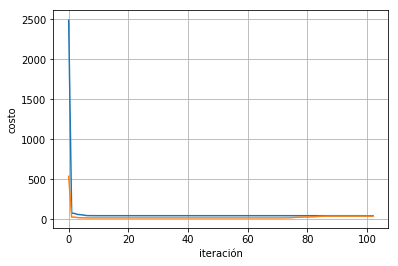

In [10]:
plt.plot(e.Costos)
plt.plot(e.CostosTest)
plt.grid(1)
plt.ylabel("costo")
plt.xlabel("iteración")